Classificação
=============

## Funções de ativação
As funções de ativação desempenham um papel fundamental em redes neurais e perceptrons na aprendizagem profunda (deep learning), pois determinam como um neurônio ou perceptron responde a estímulos e transfere informações para a camada seguinte. Aqui estão explicações para quatro funções de ativação comuns: Threshold, Sigmoid, ReLU (Rectified Linear Unit) e Tanh (Tangente Hiperbólica).

1. **Threshold (Degrau) Function:**
   - Também conhecida como a função degrau ou função de ativação binária.
   - Esta é uma função simples que produz uma saída binária (0 ou 1) com base em um limite (threshold).
   - Se a soma ponderada das entradas excede o limite, a saída é 1; caso contrário, a saída é 0.
   - É raramente usada em redes neurais modernas devido à sua natureza não diferenciável, o que torna o treinamento mais difícil.

2. **Sigmoid Function:**
   - A função sigmoide é uma função de ativação suave e contínua.
   - Ela mapeia qualquer número real para o intervalo (0, 1).
   - É **usada para problemas de classificação binária** e em camadas intermediárias de redes neurais antigas.
   - No entanto, tem um problema de desvanecimento do gradiente que pode dificultar o treinamento de redes profundas.

3. **ReLU (Rectified Linear Unit):**
   - A função ReLU é uma das funções de ativação mais populares na aprendizagem profunda.
   - Ela é definida como f(x) = max(0, x), ou seja, retorna x se x for positivo e 0 caso contrário.
   - A função ReLU é diferenciável em todos os lugares, exceto quando x é zero, mas mesmo nesse ponto é comum tratá-la como tendo derivada zero.
   - ReLU superou o Sigmoid e o Tangente Hiperbólico em popularidade devido à sua simplicidade e eficácia na aceleração do treinamento de redes profundas.

4. **Tanh (Tangente Hiperbólica):**
   - A função tangente hiperbólica é semelhante à função sigmoide, mas mapeia números reais para o intervalo (-1, 1).
   - Ela é usada para problemas de regressão e classificação.
   - Assim como o sigmoid, o tanh pode sofrer com problemas de desvanecimento do gradiente em redes muito profundas, embora em menor medida.

A escolha da função de ativação depende do problema que você está resolvendo, da arquitetura da rede e do comportamento desejado. O ReLU é uma escolha comum devido à sua eficácia na aceleração do treinamento, mas outras funções ainda têm seus usos, especialmente em casos específicos de problemas. Em muitos casos, funções de ativação variantes do ReLU, como Leaky ReLU, Parametric ReLU (PReLU), e Exponential Linear Unit (ELU), são preferidas, pois abordam algumas das limitações do ReLU original.


## Imports

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

2023-10-22 15:21:48.903546: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 15:21:48.949527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 15:21:48.950099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 15:21:50.166249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Configs

In [2]:
np.set_printoptions(suppress=True)
PLOT_WIDE = (14,7)

## Load data

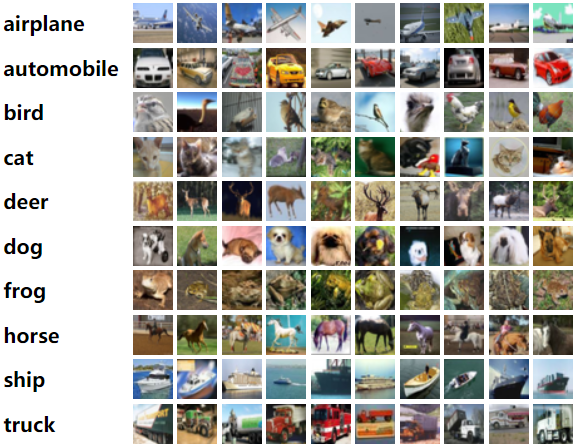

In [3]:
# Load data from dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print('shape x_train: ', x_train.shape, ' características de treinamento 50k, matrizes 32x32 e 3 cores (RGB)')
print('shape x_test: ', x_test.shape, ' características de test 10k, matrizes 32x32 e 3 cores (RGB)')
print('sahpe y_test: ', y_test.shape, 'características do resultado, 1 dimensão, 10k')

shape x_train:  (50000, 32, 32, 3)  características de treinamento 50k, matrizes 32x32 e 3 cores (RGB)
shape x_test:  (10000, 32, 32, 3)  características de test 10k, matrizes 32x32 e 3 cores (RGB)
sahpe y_test:  (10000, 1) características do resultado, 1 dimensão, 10k


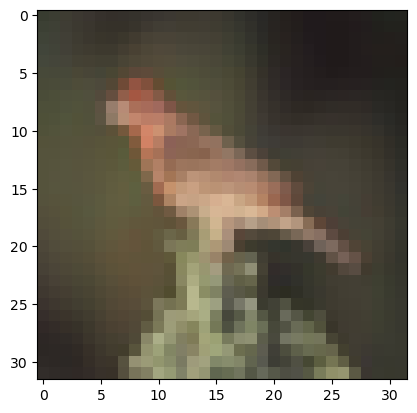

In [5]:
# Escolhendo uma imagem para plotar
sample = np.random.randint(len(x_train)-1)
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## 2. Pré-processamento

#### Normalização

In [6]:
# divide items by max value
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [7]:
# make binary categorization labels
hot = OneHotEncoder()
# '-1' get the length of array
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()



## 3. Particionamento de base de dados

In [8]:
# get 20% from train set and and extract a new validation set
x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias para o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída

In [12]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 784))
# https://keras.io/api/layers/activations/#relu-function
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
# https://keras.io/api/layers/activations/#softmax-function
rede_simples.add(Activation('softmax'))

## 5. Definir otimizadores

In [13]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [14]:
#### 6. Treinamento

# já adicionando early stopping para não rodar desnecessariamente até o final
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = rede_simples.fit(x_treino,
                             y_treino,
                             epochs = 100,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks=[es])

Epoch 1/100


2023-10-22 07:34:38.183706: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 5s 3ms/step - loss: 2.1536 - accuracy: 0.1620 - val_loss: 2.0672 - val_accuracy: 0.1772
Epoch 2/100
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0854 - accuracy: 0.1792 - val_loss: 2.0530 - val_accuracy: 0.1823
Epoch 3/100
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0477 - accuracy: 0.2014 - val_loss: 2.0003 - val_accuracy: 0.2189
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0113 - accuracy: 0.2200 - val_loss: 1.9850 - val_accuracy: 0.2267
Epoch 5/100
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0046 - accuracy: 0.2295 - val_loss: 1.9899 - val_accuracy: 0.2221
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9979 - accuracy: 0.2329 - val_loss: 1.9894 - val_accuracy: 0.2419
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9912 - accuracy: 0.2406 - val_loss: 1.9733 - val_accuracy: 0.24

## 7. Avaliação do modelo

In [15]:
pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 0s 895us/step


0.2695

In [16]:
y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7])

In [17]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [18]:
pred_simples.argmax(1)

array([1, 1, 8, ..., 7, 6, 7])

In [19]:
pred_simples[1]

array([0.05846393, 0.30038503, 0.02695353, 0.06076226, 0.01427453,
       0.03928246, 0.01834003, 0.02530047, 0.17551436, 0.28072342],
      dtype=float32)

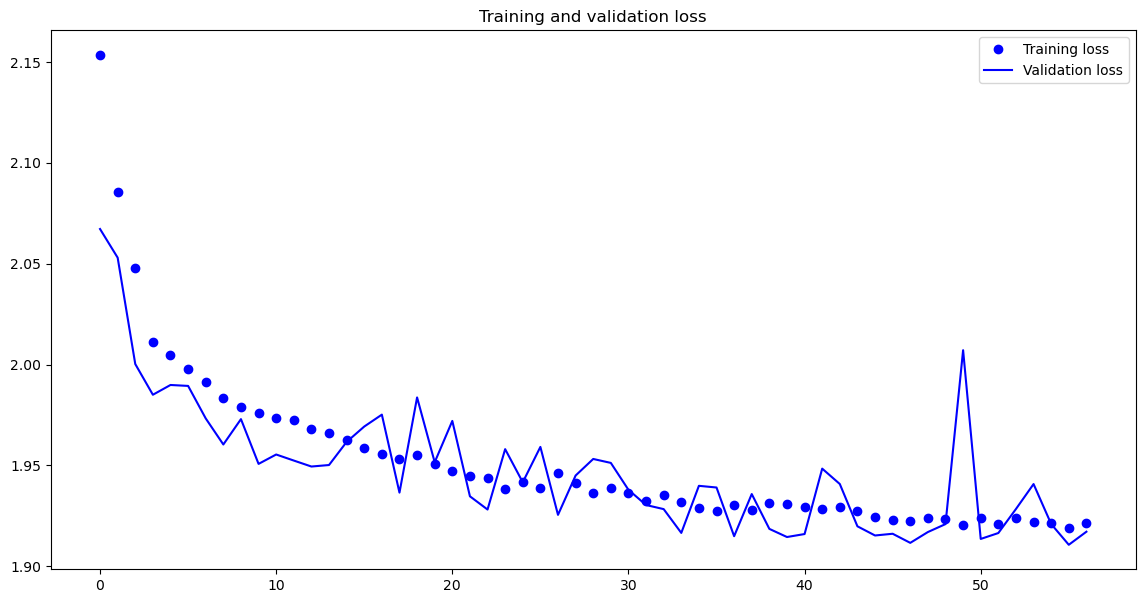

In [20]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))

plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [ ]:
# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)
historico = rede_simples.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5344 - accuracy: 0.4537 - val_loss: 1.6051 - val_accuracy: 0.4226
Epoch 2/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5307 - accuracy: 0.4527 - val_loss: 1.6009 - val_accuracy: 0.4325
Epoch 3/150
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5213 - accuracy: 0.4562 - val_loss: 1.6480 - val_accuracy: 0.4106
Epoch 4/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5208 - accuracy: 0.4550 - val_loss: 1.6018 - val_accuracy: 0.4265
Epoch 5/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5225 - accuracy: 0.4556 - val_loss: 1.6221 - val_accuracy: 0.4134
Epoch 6/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5215 - accuracy: 0.4577 - val_loss: 1.5940 - val_accuracy: 0.4307
Epoch 7/150
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5143 - accuracy: 0.4564 - val_loss: 1.5891 - val_ac

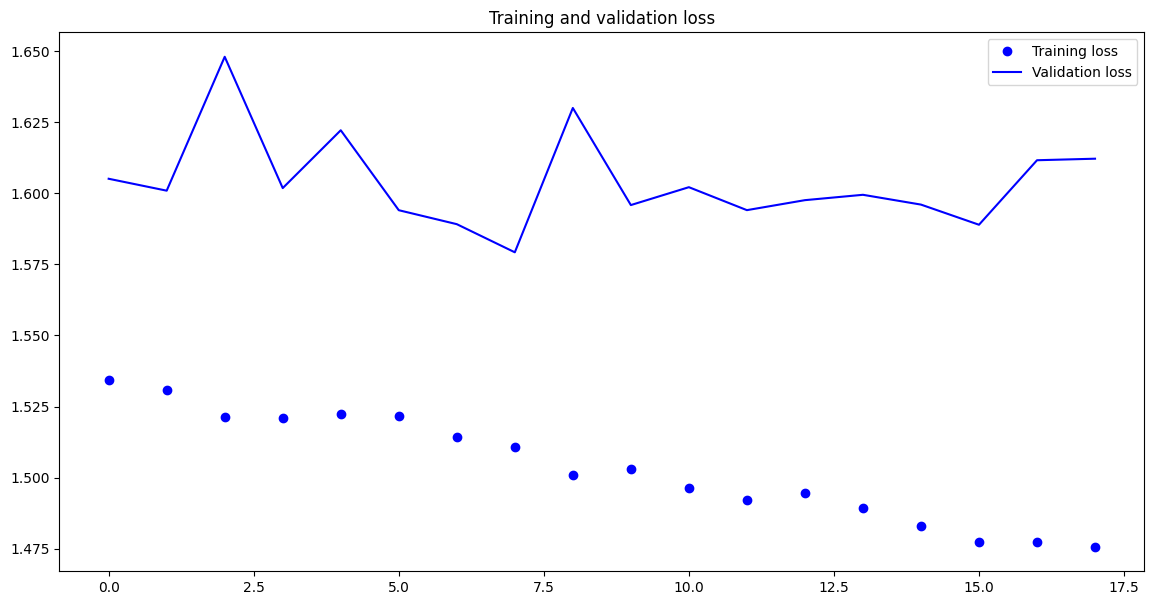

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred_es = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.4234

In [ ]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[517,  74,  36,  38,  17,  39,  16,  45, 169,  49],
       [ 36, 655,  10,  36,   8,  21,  15,  24,  75, 120],
       [117,  56, 218, 104, 125, 134, 111,  79,  35,  21],
       [ 37,  74,  51, 278,  36, 260, 117,  56,  47,  44],
       [ 82,  41, 105,  73, 299, 112, 150,  84,  36,  18],
       [ 26,  54,  61, 206,  58, 391,  79,  55,  47,  23],
       [ 11,  69,  50, 126, 107, 129, 446,  23,  16,  23],
       [ 52,  54,  44,  66,  92, 116,  33, 451,  23,  69],
       [144, 130,   7,  28,   7,  38,   6,  12, 562,  66],
       [ 49, 317,   6,  43,  10,  20,  21,  42,  75, 417]])

## Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [21]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [22]:
historico = rede_dropout.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150


2023-10-22 07:39:15.445269: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 5s 3ms/step - loss: 2.3034 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.0955
Epoch 2/150
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3030 - val_accuracy: 0.0955
Epoch 3/150
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0943
Epoch 4/150
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3031 - val_accuracy: 0.0955
Epoch 5/150
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3030 - val_accuracy: 0.0955
Epoch 6/150
1250/1250 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0943
Epoch 7/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.09

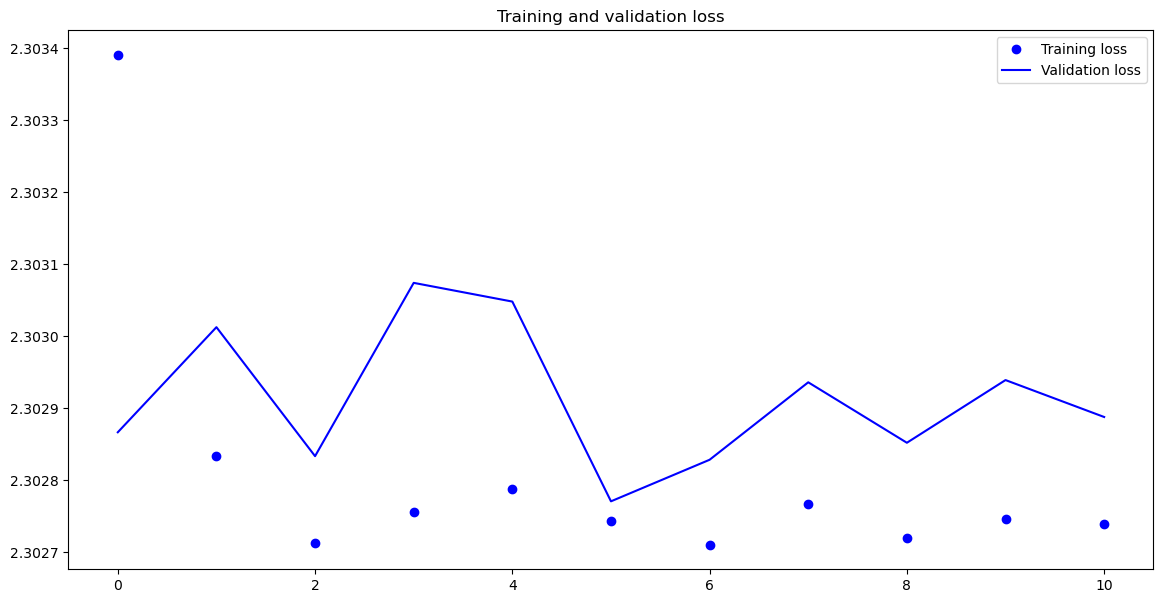

In [23]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
pred_dropout = rede_dropout.predict(x_test)
accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 0s 1ms/step


0.1

In [25]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0]])

# Regressão

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [5]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape,

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
historico = model.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 1s 39ms/step - loss: 574.8440 - mae: 22.1675 - val_loss: 499.2415 - val_mae: 20.0823
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 522.5961 - mae: 20.9976 - val_loss: 459.8315 - val_mae: 19.0130
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 479.6523 - mae: 19.9277 - val_loss: 420.1971 - val_mae: 17.9344
Epoch 4/150
6/6 [==============================] - 0s 9ms/step - loss: 434.3300 - mae: 18.8004 - val_loss: 371.7312 - val_mae: 16.6134
Epoch 5/150
6/6 [==============================] - 0s 8ms/step - loss: 381.4442 - mae: 17.4583 - val_loss: 327.6252 - val_mae: 15.3828
Epoch 6/150
6/6 [==============================] - 0s 11ms/step - loss: 332.5550 - mae: 16.0783 - val_loss: 282.4150 - val_mae: 14.2086
Epoch 7/150
6/6 [==============================] - 0s 10ms/step - loss: 282.3151 - mae: 14.6080 - val_loss: 236.6574 - val_mae: 12.8923
Epoch 8/150
6/6 [==============================] - 0

In [ ]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
mean_absolute_error(y_test, pred_simples)

2.9935626170214484

In [ ]:
resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = pred_simples

resultado

,y_test,y_pred
0,7.2,9.266814
1,18.8,17.310493
2,19.0,20.291138
3,27.0,31.582066
4,22.2,25.549246
...,...,...
97,21.9,52.345173
98,24.1,27.116039
99,50.0,47.027939
100,26.7,31.731396
